In [15]:
library(ggplot2)
library(ggplotify)
library(pheatmap)
library(patchwork)
library("FactoMineR")
library(factoextra)
library(FactoMineR)
library(ggpubr)
library(Rtsne)


Attaching package: ‘ggplot2’


The following object is masked from ‘package:randomForest’:

    margin


Bioconductor version '3.12' is out-of-date; the current release version '3.13'
  is available with R version '4.1'; see https://bioconductor.org/install

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [33]:
# Simulated data
trial <- matrix(c(90,14,6,5,112,11,6,5), ncol=2)
colnames(trial) <- c('COVID', 'Non-COVID')
rownames(trial) <- c('No_smoke', 'Yes_curr','Yes_prev','Prefer not to say')
trial.table <- as.table(trial)
print(trial.table)
print(chisq.test(trial.table))

                  COVID Non-COVID
No_smoke             90       112
Yes_curr             14        11
Yes_prev              6         6
Prefer not to say     5         5


Warning message in chisq.test(trial.table):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  trial.table
X-squared = 1.3139, df = 3, p-value = 0.7258



In [34]:
# No_change_smell
# 60 115
# slight_change
# 17 9
# moderate_smell_change
# 11 6
# smell_complete_loss
# 27 4

# Simulated data
trial <- matrix(c(60,17,11,27,115,9,6,4), ncol=2)
colnames(trial) <- c('COVID', 'Non-COVID')
rownames(trial) <- c('No_change_smell', 'slight_change','moderate_smell_change','smell_complete_loss')
trial.table <- as.table(trial)
print(trial.table)
print(chisq.test(trial.table))

                      COVID Non-COVID
No_change_smell          60       115
slight_change            17         9
moderate_smell_change    11         6
smell_complete_loss      27         4

	Pearson's Chi-squared test

data:  trial.table
X-squared = 37.048, df = 3, p-value = 4.494e-08



In [35]:
# contacts_none
# 7 14
# contact_less_5
# 15 35
# contact_5_10
# 26 40
# contact_11_20
# 29 19
# contact_21_50
# 22 14
# contact_greater_50
# 16 12

# Simulated data
trial <- matrix(c(7,15,26,29,22,16,14,35,40,19,14,12), ncol=2)
colnames(trial) <- c('COVID', 'Non-COVID')
rownames(trial) <- c('contacts_none', 'contact_less_5','contact_5_10','contact_11_20','contact_21_50','contact_greater_50')
trial.table <- as.table(trial)
print(trial.table)
print(chisq.test(trial.table))

                   COVID Non-COVID
contacts_none          7        14
contact_less_5        15        35
contact_5_10          26        40
contact_11_20         29        19
contact_21_50         22        14
contact_greater_50    16        12

	Pearson's Chi-squared test

data:  trial.table
X-squared = 16.381, df = 5, p-value = 0.005836



In [466]:
dft<-read.csv('../dataset/covid_survey_sel_data.csv')

In [111]:
dftp<-read.csv('../dataset/covid_survey_sel_data_pos.csv')
dftn<-read.csv('../dataset/covid_survey_sel_data_neg.csv')

In [124]:
binary_attributes

[1] "Female"                       "Seasonal.allergies.hay.fever"
 [3] "smell_disorder"               "taste_disorder"              
 [5] "no_comorbity"                 "Diabetes..high.blood.sugar." 
 [7] "Obesity"                      "Chronic.sinus.problems"      
 [9] "Other"                        "High.blood.pressure"         
[11] "Head.trauma"                  "Dry.mouth"                   
[13] "Heart.disease..heart.attack." "Lung.disease..asthma.COPD."  
[15] "Neurological.disease"         "Fever"                       
[17] "Changes.in.food.flavor"       "Changes.in.smell"            
[19] "Changes.in.taste"             "Headache"                    
[21] "Fatigue"                      "Body.aches"                  
[23] "Nausea"                       "No.symptoms"                 
[25] "Runny.nose"                   "Cough.with.mucus"            
[27] "Dry.cough"                    "Sore.throat"                 
[29] "Skin.sensitivity"             "Abdominal.pain"              
[31] "Chest.tightness"              "Diarrhea"                    
[33] "dry_mouth_com"                "Loss.of.appetite"            
[35] "difficult_breathing"          "no_chnage_in_taste"          
[37] "change_in_bitter"             "change_in_sweet"             
[39] "change_in_sour"               "change_in_salt"

In [123]:
binary_attributes=colnames(dft)[c(29:68)]
for (att in binary_attributes){
    print(att)
    lt<-as.list(dftp[att])
    dfreq<-count(lt,1)
    if (nrow(dfreq)==1){
        pyes<-0
    }
    else{
        pyes<-dfreq[2,]$freq
    }
    
    pno<-115-pyes
    lt<-as.list(dftn[att])
    dfreq<-count(lt,1)
    if (nrow(dfreq)==1){
        nyes<-0
    }
    else{
        nyes<-dfreq[2,]$freq
    }
    nno<-134-nyes
    print(att)
    trial <- matrix(c(pyes,pno,nyes,nno), ncol=2)
    colnames(trial) <- c('COVID', 'Non-COVID')
    rownames(trial) <- c('YES','NO')
    trial.table <- as.table(trial)
    print(trial.table)
    print(chisq.test(trial.table))
}

[1] "Female"
[1] "Female"
    COVID Non-COVID
YES    41        39
NO     74        95

	Pearson's Chi-squared test with Yates' continuity correction

data:  trial.table
X-squared = 0.93501, df = 1, p-value = 0.3336

[1] "Seasonal.allergies.hay.fever"
[1] "Seasonal.allergies.hay.fever"
    COVID Non-COVID
YES     6         9
NO    109       125

	Pearson's Chi-squared test with Yates' continuity correction

data:  trial.table
X-squared = 0.052214, df = 1, p-value = 0.8193

[1] "smell_disorder"
[1] "smell_disorder"
    COVID Non-COVID
YES     0         3
NO    115       131


Warning message in chisq.test(trial.table):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test with Yates' continuity correction

data:  trial.table
X-squared = 1.0645, df = 1, p-value = 0.3022

[1] "taste_disorder"
[1] "taste_disorder"
    COVID Non-COVID
YES     0         3
NO    115       131


Warning message in chisq.test(trial.table):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test with Yates' continuity correction

data:  trial.table
X-squared = 1.0645, df = 1, p-value = 0.3022

[1] "no_comorbity"
[1] "no_comorbity"
    COVID Non-COVID
YES    45        89
NO     70        45

	Pearson's Chi-squared test with Yates' continuity correction

data:  trial.table
X-squared = 17.459, df = 1, p-value = 2.936e-05

[1] "Diabetes..high.blood.sugar."
[1] "Diabetes..high.blood.sugar."
    COVID Non-COVID
YES     5         5
NO    110       129


Warning message in chisq.test(trial.table):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test with Yates' continuity correction

data:  trial.table
X-squared = 1.1952e-31, df = 1, p-value = 1

[1] "Obesity"
[1] "Obesity"
    COVID Non-COVID
YES     4         9
NO    111       125

	Pearson's Chi-squared test with Yates' continuity correction

data:  trial.table
X-squared = 0.73866, df = 1, p-value = 0.3901

[1] "Chronic.sinus.problems"
[1] "Chronic.sinus.problems"
    COVID Non-COVID
YES     4         1
NO    111       133


Warning message in chisq.test(trial.table):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test with Yates' continuity correction

data:  trial.table
X-squared = 1.1644, df = 1, p-value = 0.2806

[1] "Other"
[1] "Other"
    COVID Non-COVID
YES     0         3
NO    115       131


Warning message in chisq.test(trial.table):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test with Yates' continuity correction

data:  trial.table
X-squared = 1.0645, df = 1, p-value = 0.3022

[1] "High.blood.pressure"
[1] "High.blood.pressure"
    COVID Non-COVID
YES    10        10
NO    105       124

	Pearson's Chi-squared test with Yates' continuity correction

data:  trial.table
X-squared = 0.015136, df = 1, p-value = 0.9021

[1] "Head.trauma"
[1] "Head.trauma"
    COVID Non-COVID
YES     3         0
NO    112       134


Warning message in chisq.test(trial.table):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test with Yates' continuity correction

data:  trial.table
X-squared = 1.686, df = 1, p-value = 0.1941

[1] "Dry.mouth"
[1] "Dry.mouth"
    COVID Non-COVID
YES     3         3
NO    112       131


Warning message in chisq.test(trial.table):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test with Yates' continuity correction

data:  trial.table
X-squared = 6.5807e-29, df = 1, p-value = 1

[1] "Heart.disease..heart.attack."
[1] "Heart.disease..heart.attack."
    COVID Non-COVID
YES     1         0
NO    114       134


Warning message in chisq.test(trial.table):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test with Yates' continuity correction

data:  trial.table
X-squared = 0.0058802, df = 1, p-value = 0.9389

[1] "Lung.disease..asthma.COPD."
[1] "Lung.disease..asthma.COPD."
    COVID Non-COVID
YES     2         0
NO    113       134


Warning message in chisq.test(trial.table):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test with Yates' continuity correction

data:  trial.table
X-squared = 0.67356, df = 1, p-value = 0.4118

[1] "Neurological.disease"
[1] "Neurological.disease"
    COVID Non-COVID
YES     2         0
NO    113       134


Warning message in chisq.test(trial.table):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test with Yates' continuity correction

data:  trial.table
X-squared = 0.67356, df = 1, p-value = 0.4118

[1] "Fever"
[1] "Fever"
    COVID Non-COVID
YES    79        27
NO     36       107

	Pearson's Chi-squared test with Yates' continuity correction

data:  trial.table
X-squared = 57.69, df = 1, p-value = 3.069e-14

[1] "Changes.in.food.flavor"
[1] "Changes.in.food.flavor"
    COVID Non-COVID
YES     8         3
NO    107       131

	Pearson's Chi-squared test with Yates' continuity correction

data:  trial.table
X-squared = 2.2405, df = 1, p-value = 0.1344

[1] "Changes.in.smell"
[1] "Changes.in.smell"
    COVID Non-COVID
YES    17         6
NO     98       128

	Pearson's Chi-squared test with Yates' continuity correction

data:  trial.table
X-squared = 6.658, df = 1, p-value = 0.009871

[1] "Changes.in.taste"
[1] "Changes.in.taste"
    COVID Non-COVID
YES    17         5
NO     98       129

	Pearson's Chi-squared test with Yates' continuity correction

da

Warning message in chisq.test(trial.table):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test with Yates' continuity correction

data:  trial.table
X-squared = 3.4566e-29, df = 1, p-value = 1

[1] "No.symptoms"
[1] "No.symptoms"
    COVID Non-COVID
YES    13        52
NO    102        82

	Pearson's Chi-squared test with Yates' continuity correction

data:  trial.table
X-squared = 22.861, df = 1, p-value = 1.742e-06

[1] "Runny.nose"
[1] "Runny.nose"
    COVID Non-COVID
YES    29        19
NO     86       115

	Pearson's Chi-squared test with Yates' continuity correction

data:  trial.table
X-squared = 4.1624, df = 1, p-value = 0.04133

[1] "Cough.with.mucus"
[1] "Cough.with.mucus"
    COVID Non-COVID
YES    37        11
NO     78       123

	Pearson's Chi-squared test with Yates' continuity correction

data:  trial.table
X-squared = 21.327, df = 1, p-value = 3.872e-06

[1] "Dry.cough"
[1] "Dry.cough"
    COVID Non-COVID
YES    25        20
NO     90       114

	Pearson's Chi-squared test with Yates' continuity correction

data:  trial.table
X-squar

Warning message in chisq.test(trial.table):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test with Yates' continuity correction

data:  trial.table
X-squared = 2.688, df = 1, p-value = 0.1011

[1] "Abdominal.pain"
[1] "Abdominal.pain"
    COVID Non-COVID
YES     2         7
NO    113       127


Warning message in chisq.test(trial.table):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test with Yates' continuity correction

data:  trial.table
X-squared = 1.2729, df = 1, p-value = 0.2592

[1] "Chest.tightness"
[1] "Chest.tightness"
    COVID Non-COVID
YES    17         3
NO     98       131

	Pearson's Chi-squared test with Yates' continuity correction

data:  trial.table
X-squared = 11.539, df = 1, p-value = 0.0006815

[1] "Diarrhea"
[1] "Diarrhea"
    COVID Non-COVID
YES     4         5
NO    111       129


Warning message in chisq.test(trial.table):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test with Yates' continuity correction

data:  trial.table
X-squared = 9.2102e-29, df = 1, p-value = 1

[1] "dry_mouth_com"
[1] "dry_mouth_com"
    COVID Non-COVID
YES     7         4
NO    108       130

	Pearson's Chi-squared test with Yates' continuity correction

data:  trial.table
X-squared = 0.77127, df = 1, p-value = 0.3798

[1] "Loss.of.appetite"
[1] "Loss.of.appetite"
    COVID Non-COVID
YES     7         5
NO    108       129

	Pearson's Chi-squared test with Yates' continuity correction

data:  trial.table
X-squared = 0.32318, df = 1, p-value = 0.5697

[1] "difficult_breathing"
[1] "difficult_breathing"
    COVID Non-COVID
YES    10         1
NO    105       133

	Pearson's Chi-squared test with Yates' continuity correction

data:  trial.table
X-squared = 7.4749, df = 1, p-value = 0.006256

[1] "no_chnage_in_taste"
[1] "no_chnage_in_taste"
    COVID Non-COVID
YES    76       119
NO     39        15

	Pearson's Chi-squared test with Yates' continuity c

In [217]:
# Libraries
library(ggplot2)
# library(hrbrthemes)
# library(dplyr)
# library(tidyr)
# library(viridis)

# The diamonds dataset is natively available with R.
png('../figures/smell_test_density1.png',width=1200,height=800)
par(mfrow=c(3, 2),cex=1.5)
#colnames<-c('Lemon','Milk','coffee','Sugar','Salt','Sour','Bitter','Chilly')
#colnames<-c('Laundry Detergent','Clove','Coriander Seeds','Garam Masala','Smell Irritants')
colnames<-c('laundry.detergent','Clove.lavang.','Coriander.seeds.Dhania','Garam.Goda.masala','smell_irritants_product')
#colnames <- dimnames(crime.new)[[2]]
indices<-c(2,3,4,5,14)
for (i in 1:5) {
# Without transparency (left)
    ggplot(data=dft, aes(x=colnames[[i]], group=Diagnosed, fill=Diagnosed),cex=1.5) +
        geom_density(adjust=1.5) +
      theme(plot.title = element_text(hjust = 0.5),text = element_text(size=40),
            axis.text.x = element_text(angle=0, hjust=0.5,vjust=0.5),legend.key.size = unit(1.6,"line"))
    
    #theme_ipsum()
}
#p1
#dev.off()
# With transparency (right)
p2 <- ggplot(data=diamonds, aes(x=price, group=cut, fill=cut),cex=3.5) +
    geom_density(adjust=1.5, alpha=.4) 
    #theme_ipsum()

In [622]:
# Libraries
library(ggplot2)
library(ggpubr)
# library(hrbrthemes)
# library(dplyr)
# library(tidyr)
# library(viridis)

# The diamonds dataset is natively available with R.
#png('../figures/smell_test_density_multi.png',width=1200,height=800)
#par(mfrow=c(3, 2),cex=1.5)
#colnames<-c('Lemon','Milk','coffee','Sugar','Salt','Sour','Bitter','Chilly')
#colnames<-c('Laundry Detergent','Clove','Coriander Seeds','Garam Masala','Smell Irritants')
#colnames<-c('laundry.detergent','Clove.lavang.','Coriander.seeds.Dhania','Garam.Goda.masala','smell_irritants_product')
#colnames <- dimnames(crime.new)[[2]]
#indices<-c(2,3,4,5,14)

#panel.grid.major = element_blank(), panel.grid.minor = element_blank(), panel.background = element_blank(), axis.line = element_line(colour = "black")

pl1<-ggplot(data=dft, aes(x=laundry.detergent, group=Diagnosed, fill=Diagnosed),cex=1.5) +
        geom_density(adjust=1.5,alpha=0.5) +
      theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(), panel.background = element_blank(), axis.line = element_line(colour = "black")
,plot.title = element_text(hjust = 0.5),text = element_text(size=20),
            axis.text.x = element_text(angle=0, hjust=0.5,vjust=0.5),legend.position="none")+xlab('Cleansing products')+
  scale_fill_manual(values=c("maroon","lightsalmon"))#legend.key.size = unit(1.6,"line"))+le

pl2<-ggplot(data=dft, aes(x=Clove.lavang., group=Diagnosed, fill=Diagnosed),cex=1.5) +
        geom_density(adjust=1.5,alpha=0.5) +
      theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(), panel.background = element_blank(), axis.line = element_line(colour = "black")
,plot.title = element_text(hjust = 0.5),text = element_text(size=20),
            axis.text.x = element_text(angle=0, hjust=0.5,vjust=0.5),legend.position="none")+xlab('Spices/Herbs-1')+
  scale_fill_manual(values=c("maroon","lightsalmon"))#,legend.key.size = unit(1.6,"line"))

pl3<-ggplot(data=dft, aes(x=Coriander.seeds.Dhania, group=Diagnosed, fill=Diagnosed),cex=1.5) +
        geom_density(adjust=1.5,alpha=0.5) +
      theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(), panel.background = element_blank(), axis.line = element_line(colour = "black")
,plot.title = element_text(hjust = 0.5),text = element_text(size=20),
            axis.text.x = element_text(angle=0, hjust=0.5,vjust=0.5),legend.position="none")+xlab('Spices/Herbs-2')+
  scale_fill_manual(values=c("maroon","lightsalmon"))#,legend.key.size = unit(1.6,"line"))

pl4<-ggplot(data=dft, aes(x=Garam.Goda.masala, group=Diagnosed, fill=Diagnosed),cex=1.5) +
        geom_density(adjust=1.5,alpha=0.5) +
      theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(), panel.background = element_blank(), axis.line = element_line(colour = "black")
,plot.title = element_text(hjust = 0.5),text = element_text(size=20),
            axis.text.x = element_text(angle=0, hjust=0.5,vjust=0.5),legend.position="none")+xlab('Spices Mixtures')+
  scale_fill_manual(values=c("maroon","lightsalmon"))#,legend.key.size = unit(1.6,"line"))

pl5<-ggplot(data=dft, aes(x=smell_irritants_product, group=Diagnosed, fill=Diagnosed),cex=1.5) +
        geom_density(adjust=1.5,alpha=0.5) +
      theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(), panel.background = element_blank(), axis.line = element_line(colour = "black")
,plot.title = element_text(hjust = 0.5),text = element_text(size=20),
            axis.text.x = element_text(angle=0, hjust=0.5,vjust=0.5),legend.position="none")+xlab('Smell Irritants')+
  scale_fill_manual(values=c("maroon","lightsalmon"))#,legend.key.size = unit(1.6,"line"))
    #theme_ipsum()

pl6<-ggplot(data=dft, aes(x=lemon, group=Diagnosed, fill=Diagnosed),cex=1.5) +
        geom_density(adjust=1.5,alpha=0.5) +
      theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(), panel.background = element_blank(), axis.line = element_line(colour = "black")
,plot.title = element_text(hjust = 0.5),text = element_text(size=20),
            axis.text.x = element_text(angle=0, hjust=0.5,vjust=0.5),legend.position="none")+xlab('Fruits/Fruits Juices/Vegetables')+
  scale_fill_manual(values=c("maroon","lightsalmon"))#legend.key.size = unit(1.6,"line"))+le

pl7<-ggplot(data=dft, aes(x=Milk, group=Diagnosed, fill=Diagnosed),cex=1.5) +
        geom_density(adjust=1.5,alpha=0.5) +
      theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(), panel.background = element_blank(), axis.line = element_line(colour = "black")
,plot.title = element_text(hjust = 0.5),text = element_text(size=20),
            axis.text.x = element_text(angle=0, hjust=0.5,vjust=0.5),legend.position="none")+xlab('Dairy Products')+
  scale_fill_manual(values=c("maroon","lightsalmon"))#,legend.key.size = unit(1.6,"line"))

pl8<-ggplot(data=dft, aes(x=coffee, group=Diagnosed, fill=Diagnosed),cex=1.5) +
        geom_density(adjust=1.5,alpha=0.5) +
      theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(), panel.background = element_blank(), axis.line = element_line(colour = "black")
,plot.title = element_text(hjust = 0.5),text = element_text(size=20),
            axis.text.x = element_text(angle=0, hjust=0.5,vjust=0.5),legend.position="none")+xlab('Other Products')+
  scale_fill_manual(values=c("maroon","lightsalmon"))#,legend.key.size = unit(1.6,"line"))

figure <- ggarrange(pl1,pl2,pl3,pl4,pl5,pl6,pl7,pl8,
                    labels = c("A", "B", "C","D","E","F","G","H"),
                    ncol = 3, nrow = 3)
#dev.off()
    #theme_ipsum()

In [623]:
png('../figures/smell_test_density_multi6.png',width=1200,height=1200)
figure
dev.off()

png 
  2

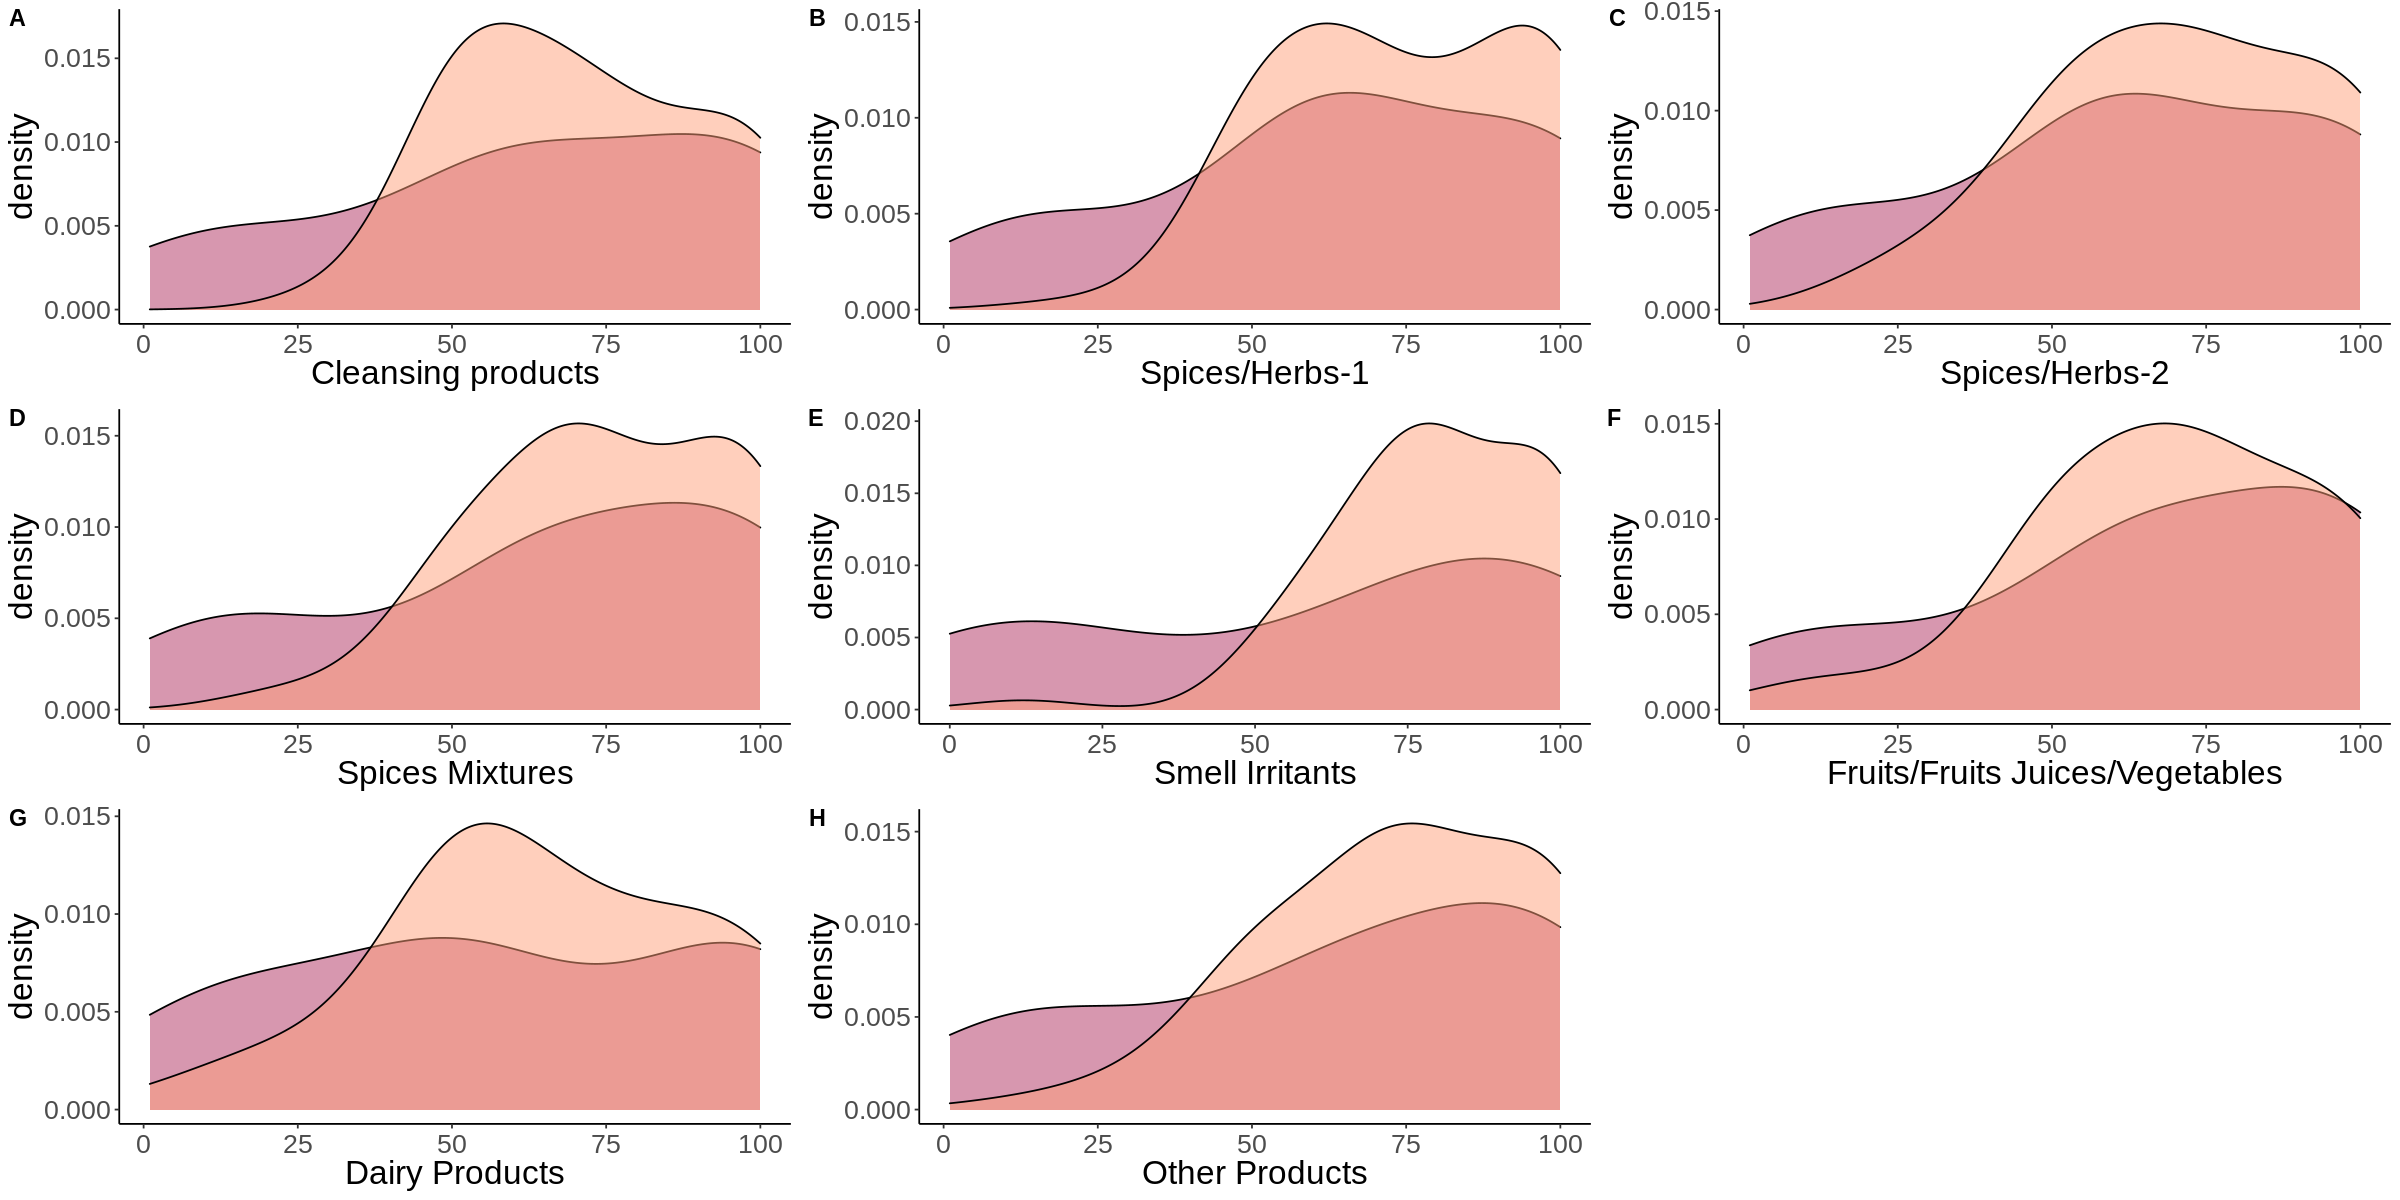

In [619]:
figure

In [624]:
# Libraries
library(ggplot2)
library(ggpubr)
# library(hrbrthemes)
# library(dplyr)
# library(tidyr)
# library(viridis)

# The diamonds dataset is natively available with R.
#png('../figures/smell_test_density_multi.png',width=1200,height=800)
#par(mfrow=c(3, 2),cex=1.5)
#colnames<-c('Lemon','Milk','coffee','Sugar','Salt','Sour','Bitter','Chilly')
#colnames<-c('Laundry Detergent','Clove','Coriander Seeds','Garam Masala','Smell Irritants')
#colnames<-c('laundry.detergent','Clove.lavang.','Coriander.seeds.Dhania','Garam.Goda.masala','smell_irritants_product')
#colnames <- dimnames(crime.new)[[2]]
#indices<-c(2,3,4,5,14)
#'lemon''Milk''coffee''Sugar''Salt''Sour''Bitter''chilly'


ql1<-ggplot(data=dft, aes(x=Sugar, group=Diagnosed, fill=Diagnosed),cex=1.5) +
        geom_density(adjust=1.5,alpha=0.5) +
      theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(), panel.background = element_blank(), axis.line = element_line(colour = "black")
,plot.title = element_text(hjust = 0.5),text = element_text(size=20),
            axis.text.x = element_text(angle=0, hjust=0.5,vjust=0.5),legend.position="none")+xlab('Sugar')+
  scale_fill_manual(values=c("maroon","lightsalmon"))#,legend.key.size = unit(1.6,"line"))

ql2<-ggplot(data=dft, aes(x=Salt, group=Diagnosed, fill=Diagnosed),cex=1.5) +
        geom_density(adjust=1.5,alpha=0.5) +
      theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(), panel.background = element_blank(), axis.line = element_line(colour = "black")
,plot.title = element_text(hjust = 0.5),text = element_text(size=20),
            axis.text.x = element_text(angle=0, hjust=0.5,vjust=0.5),legend.position="none")+xlab('Salt')+
  scale_fill_manual(values=c("maroon","lightsalmon"))#,legend.key.size = unit(1.6,"line"))

ql3<-ggplot(data=dft, aes(x=Sour, group=Diagnosed, fill=Diagnosed),cex=1.5) +
        geom_density(adjust=1.5,alpha=0.5) +
      theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(), panel.background = element_blank(), axis.line = element_line(colour = "black")
,plot.title = element_text(hjust = 0.5),text = element_text(size=20),
            axis.text.x = element_text(angle=0, hjust=0.5,vjust=0.5),legend.position="none")+xlab('Sour')+
  scale_fill_manual(values=c("maroon","lightsalmon"))#,legend.key.size = unit(1.6,"line"))

ql4<-ggplot(data=dft, aes(x=Bitter, group=Diagnosed, fill=Diagnosed),cex=1.5) +
        geom_density(adjust=1.5,alpha=0.5) +
      theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(), panel.background = element_blank(), axis.line = element_line(colour = "black")
,plot.title = element_text(hjust = 0.5),text = element_text(size=20),
            axis.text.x = element_text(angle=0, hjust=0.5,vjust=0.5),legend.position="none")+xlab('Bitter')+
  scale_fill_manual(values=c("maroon","lightsalmon"))#,legend.key.size = unit(1.6,"line"))


ql5<-ggplot(data=dft, aes(x=chilly, group=Diagnosed, fill=Diagnosed),cex=1.5) +
        geom_density(adjust=1.5,alpha=0.5) +
      theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(), panel.background = element_blank(), axis.line = element_line(colour = "black")
,plot.title = element_text(hjust = 0.5),text = element_text(size=20),
            axis.text.x = element_text(angle=0, hjust=0.5,vjust=0.5),legend.position="none")+xlab('Chilly')+
  scale_fill_manual(values=c("maroon","lightsalmon"))#,legend.key.size = unit(1.6,"line"))
    #theme_ipsum()
figure1 <- ggarrange(ql1,ql2,ql3,ql4,ql5,
                    labels = c("A", "B", "C","D","E","F","G","H"),
                    ncol = 3, nrow = 2)
#dev.off()
    #theme_ipsum()

In [625]:
png('../figures/test_density_multi6.png',width=1200,height=800)
figure1
dev.off()

png 
  2

In [297]:
M=cor(dft[ , health_atts],method='kendall')
# mat : is a matrix of data
# ... : further arguments to pass to the native R cor.test function
cor.mtest <- function(mat) {
    mat <- as.matrix(mat)
    n <- ncol(mat)
    p.mat<- matrix(NA, n, n)
    diag(p.mat) <- 0
    for (i in 1:(n - 1)) {
        for (j in (i + 1):n) {
            tmp <- cor.test(mat[, i], mat[, j],method="kendall")
            p.mat[i, j] <- p.mat[j, i] <- tmp$p.value
        }
    }
  colnames(p.mat) <- rownames(p.mat) <- colnames(mat)
  p.mat
}
# matrix of the p-value of the correlation
p.mat <- cor.mtest(dft[ , health_atts])
head(p.mat[, 1:5])

,Seasonal.allergies.hay.fever,smell_disorder,taste_disorder,Diabetes..high.blood.sugar.,Obesity
Seasonal.allergies.hay.fever,0.000000000,6.597140e-01,6.597140e-01,0.41474252,0.79552542
smell_disorder,0.659714019,0.000000e+00,1.722277e-25,0.72204310,0.02796296
taste_disorder,0.659714019,1.722277e-25,0.000000e+00,0.72204310,0.68315335
Diabetes..high.blood.sugar.,0.414742516,7.220431e-01,7.220431e-01,0.00000000,0.03234152
Obesity,0.795525423,2.796296e-02,6.831534e-01,0.03234152,0.00000000
Chronic.sinus.problems,0.001285994,8.034008e-01,8.034008e-01,0.64471021,0.13420114


In [343]:
col <- colorRampPalette(c("#BB4444", "#EE9988", "#FFFFFF", "#77AADD", "#4477AA"))
png(height=1200, width=1200, pointsize=15,file="../figures/corr_health3_lower.png")
colnames(M) <- c("Seasonal\nAllergies", "Smell Disorder", "Taste Disorder","Diabetes","Obesity","Chronic Sinus\nProblems",'High BP','Head Trauma','Dry Mouth' ,'Heart Disease\n(Heart Attack)','Lung Disease\n(Asthma/COPD)','Neurological\nDisease','Others')
rownames(M) <- c("Seasonal\nAllergies", "Smell Disorder", "Taste Disorder","Diabetes","Obesity","Chronic Sinus\nProblems",'High BP','Head Trauma','Dry Mouth' ,'Heart Disease\n(Heart Attack)','Lung Disease\n(Asthma/COPD)','Neurological\nDisease','Others')
pltt<-corrplot(M, method="color",  
         type="lower", order="hclust", 
         addCoef.col = "black", # Add coefficient of correlation
         tl.col="black", tl.srt=0, #Text label color and rotation
         # Combine with significance
         p.mat = p.mat, sig.level = 0.05, 
         # hide correlation coefficient on the principal diagonal
         diag=FALSE,number.cex=1.5,tl.cex = 1.5
         )
dev.off()

png 
  2

In [349]:
lengths(symptoms_atts)
lengths(colnames(M))

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1

In [626]:
symptoms_atts<-c('Fever','Changes.in.food.flavor','Changes.in.smell','Changes.in.taste','Headache','Fatigue','Body.aches','Nausea','Runny.nose','Cough.with.mucus','Dry.cough','Sore.throat','Skin.sensitivity','Abdominal.pain','Chest.tightness','Diarrhea','dry_mouth_com','Loss.of.appetite','difficult_breathing')
# matrix of the p-value of the correlation
M=cor(dft[ , symptoms_atts],method='kendall')
p.mat <- cor.mtest(dft[ , symptoms_atts])


col <- colorRampPalette(c("#BB4444", "#EE9988", "#FFFFFF", "#77AADD", "#4477AA"))
png(height=1200, width=1200, pointsize=15,file="../figures/corr_symptoms_lower1.png")
colnames(M) <- c('Fever','Food Flavor\nChange','Smell Change','Taste Change','Headache','Fatigue','Body Aches','Nausea','Runny Nose','Cough with Mucus','Dry Cough','Sore throat','Skin Sensitivity','Abdominal Pain','Chest Tightness','Diarrhea','Dry Mouth','Loss of Appetite','Breathing Difficulty')
rownames(M) <- c('Fever','Food Flavor\nChange','Smell Change','Taste Change','Headache','Fatigue','Body Aches','Nausea','Runny Nose','Cough with Mucus','Dry Cough','Sore throat','Skin Sensitivity','Abdominal Pain','Chest Tightness','Diarrhea','Dry Mouth','Loss of Appetite','Breathing Difficulty')
pltt<-corrplot(M, method="color",  
         type="lower", order="hclust", 
         addCoef.col = "black", # Add coefficient of correlation
         tl.col="black", tl.srt=45, #Text label color and rotation
         # Combine with significance
         p.mat = p.mat, sig.level = 0.05, 
         # hide correlation coefficient on the principal diagonal
         diag=FALSE,number.cex=1.0,tl.cex = 1.5
         )
dev.off()

png 
  2

In [627]:
library(corrplot)
library(RColorBrewer)
cor.mtest <- function(mat) {
    mat <- as.matrix(mat)
    n <- ncol(mat)
    p.mat<- matrix(NA, n, n)
    diag(p.mat) <- 0
    for (i in 1:(n - 1)) {
        for (j in (i + 1):n) {
            tmp <- cor.test(mat[, i], mat[, j],method="kendall")
            p.mat[i, j] <- p.mat[j, i] <- tmp$p.value
        }
    }
  colnames(p.mat) <- rownames(p.mat) <- colnames(mat)
  p.mat
}
#dft$Bitter,dft$Sugar,dft$Salt,dft$ch
#'Clove.lavang.','Coriander.seeds.Dhania','Garam.Goda.masala','coffee','smell_irritants_product'
taste_test_atts<-c('Sugar','Salt','Sour','chilly')
smell_test_atts<-c('Clove.lavang.','Coriander.seeds.Dhania','Garam.Goda.masala','smell_irritants_product','coffee')
# matrix of the p-value of the correlation

col <- colorRampPalette(c("#BB4444", "#EE9988", "#FFFFFF", "#77AADD", "#4477AA"))
png(height=500, width=1200, pointsize=15,file="../figures/corr_taste_smell__test_sep_symptoms_lower_sig1.png")
par(mfrow=c(1,2))
    
M=cor(dft[ , smell_test_atts],method='kendall')
p.mat <- cor.mtest(dft[ , smell_test_atts])
colnames(M) <- c('Spices/\nHerbs-1','Spices/\nHerbs-1','Spices\nMix','Irritants','Others')
rownames(M) <- c('Spices/\nHerbs-1','Spices/\nHerbs-1','Spices\nMix','Irritants','Others')
#colnames(M) <- c('Sweet','Sour','Salt','No')
#rownames(M) <- c('Sweet','Sour','Salt','No')
pltt2<-corrplot(M, method="color",  
         type="lower", order="hclust", 
         addCoef.col = "black", # Add coefficient of correlation
         tl.col="black", tl.srt=45, #Text label color and rotation
         # Combine with significance
         p.mat = p.mat, sig.level = 0.05, 
         # hide correlation coefficient on the principal diagonal
         diag=FALSE,number.cex=1.0,tl.cex = 1.5
         )




M=cor(dft[ , taste_test_atts],method='kendall')
p.mat <- cor.mtest(dft[ , taste_test_atts])



colnames(M) <- c('Sweet','Salt','Sour','Chilly')
rownames(M) <- c('Sweet','Salt','Sour','Chilly')

pltt1<-corrplot(M, method="color",  
         type="lower", order="hclust", 
         addCoef.col = "black", # Add coefficient of correlation
         tl.col="black", tl.srt=45, #Text label color and rotation
         # Combine with significance
         p.mat = p.mat, sig.level = 0.05, 
         # hide correlation coefficient on the principal diagonal
         diag=FALSE,number.cex=1.0,tl.cex = 1.5
         )


#both_pltt<-pltt2|pltt1
dev.off()

png 
  2

In [3]:
dft1=read.csv('../dataset/covid_survey_sel_data_pstd.csv')
dft2=read.csv('../dataset/covid_survey_sel_data_pstd_sg.csv')

In [464]:
library('ggmosaic')


df_generic=read.csv('../dataset/generic_features.csv')
#Smoker <- factor(df_generic$Smoker, levels=c("Not Known", "No", "Yes(Previous)","Yes(Current)"))
p<-ggplot(data = df_generic) +
  geom_mosaic(aes(x = product(Gender, Diagnosed), fill=Gender),offset=0.05)+
  scale_fill_manual(values=c("red","green","brown","plum1","plum"))+

  theme(plot.title = element_text(hjust = 0.5),text = element_text(size=6),
        axis.text.x = element_text(angle=0, hjust=0.5,vjust=0.5),legend.position="none",#,colour = "grey40",size=4),
       panel.background = element_rect(fill = "white",
                                colour = "white",
                                size = 0.5, linetype = "solid"),
  panel.grid.major = element_line(size = 0.5, linetype = 'solid',
                                colour = "white"), 
  panel.grid.minor = element_line(size = 0.25, linetype = 'solid',
                                colour = "white"),axis.line = element_line(colour = "black"))+
labs(x=expression(bold("Diagnosed")),y=expression(bold("Gender")))

df_generic=read.csv('../dataset/generic_features.csv')
df_generic$Contacts <- factor(df_generic$Contacts, levels=c("None", "1 to 4", "5 to 10","11 to 20","21 to 50",">50"))
q<-ggplot(data = df_generic) +
  geom_mosaic(aes(x = product(Contacts, Diagnosed), fill=Contacts),offset=0.05)+
  scale_fill_manual(values=c("red","green","brown","plum1","plum","papayawhip"))+

  theme(plot.title = element_text(hjust = 0.5),text = element_text(size=6),
        axis.text.x = element_text(angle=0, hjust=0.5,vjust=0.5),legend.position="none",#,colour = "grey40",size=4),
       panel.background = element_rect(fill = "white",
                                colour = "white",
                                size = 0.5, linetype = "solid"),
  panel.grid.major = element_line(size = 0.5, linetype = 'solid',
                                colour = "white"), 
  panel.grid.minor = element_line(size = 0.25, linetype = 'solid',
                                colour = "white"),axis.line = element_line(colour = "black"))+
labs(x=expression(bold("Diagnosed")),y=expression(bold("In-Contact")))


df_generic=read.csv('../dataset/generic_features.csv')
Smoker <- factor(df_generic$Smoker, levels=c("Not Known", "No", "Yes(Previous)","Yes(Current)"))
r<-ggplot(data = df_generic) +
  geom_mosaic(aes(x = product(Smoker, Diagnosed), fill=Smoker),offset=0.05)+
  scale_fill_manual(values=c("red","green","brown","plum1","plum"))+

  theme(plot.title = element_text(hjust = 0.5),text = element_text(size=6),
        axis.text.x = element_text(angle=0, hjust=0.5,vjust=0.5),legend.position="none",#,colour = "grey40",size=4),
       panel.background = element_rect(fill = "white",
                                colour = "white",
                                size = 0.5, linetype = "solid"),
  panel.grid.major = element_line(size = 0.5, linetype = 'solid',
                                colour = "white"), 
  panel.grid.minor = element_line(size = 0.25, linetype = 'solid',
                                colour = "white"),axis.line = element_line(colour = "black"))+
labs(x=expression(bold("Diagnosed")),y=expression(bold("Smoker")))


options(repr.plot.width = 20, repr.plot.height = 10)
ggsave("../figures/mosaic_gender_contacts__smoker_pstd.png", p|q|r, width = 5, height = 2.1)

In [462]:
library('ggmosaic')
#library('ggpattern')

df_generic=read.csv('../dataset/taste_smell_features.csv')
df_generic$Taste_Change <- factor(df_generic$Taste_Change, levels=c("No", "Sour","Bitter","Salt","Sweet"))
p<-ggplot(data = df_generic,pattern=Nerd) +
  geom_mosaic(aes(x = product(Taste_Change, Diagnosed), fill=Taste_Change),offset=0.05)+
  scale_fill_manual(values=c("red","green","brown","plum1","plum"))+

  theme(plot.title = element_text(hjust = 0.5),text = element_text(size=6),
        axis.text.x = element_text(angle=0, hjust=0.5,vjust=0.5),legend.position="none",#,colour = "grey40",size=4),
       panel.background = element_rect(fill = "white",
                                colour = "white",
                                size = 0.5, linetype = "solid"),
  panel.grid.major = element_line(size = 0.5, linetype = 'solid',
                                colour = "white"), 
  panel.grid.minor = element_line(size = 0.25, linetype = 'solid',
                                colour = "white"),axis.line = element_line(colour = "black"))+
labs(x=expression(bold("Diagnosed")),y=expression(bold("Taste Change")))

df_generic=read.csv('../dataset/taste_smell_features.csv')
df_generic$Smell_Change <- factor(df_generic$Smell_Change, levels=c("No","Slight","Moderate","Complete Loss"))
q<-ggplot(data = df_generic) +
  geom_mosaic(aes(x = product(Smell_Change, Diagnosed), fill=Smell_Change),offset=0.05)+
  scale_fill_manual(values=c("red","green","brown","plum1","plum"))+

  theme(plot.title = element_text(hjust = 0.5),text = element_text(size=6),
        axis.text.x = element_text(angle=0, hjust=0.5,vjust=0.5),legend.position="none",#,colour = "grey40",size=4),
       panel.background = element_rect(fill = "white",
                                colour = "white",
                                size = 0.5, linetype = "solid"),
  panel.grid.major = element_line(size = 0.5, linetype = 'solid',
                                colour = "white"), 
  panel.grid.minor = element_line(size = 0.25, linetype = 'solid',
                                colour = "white"),axis.line = element_line(colour = "black"))+
labs(x=expression(bold("Diagnosed")),y=expression(bold("Smell Change")))





options(repr.plot.width = 20, repr.plot.height = 10)
ggsave("../figures/mosaic_taste_smell.png", p|q, width = 3.5, height = 2.1)

In [408]:
#h1 <- factor(dfh$h1, levels=c("No","Yes"))
df2 <- data.frame(Diagnosed=rep(c("COVID", "Non-COVID"), each=1),
                Moral=rep(c("")),
                Percentage=c(0,2.24))
p14<-ggplot(data=df2, aes(x=Diagnosed, y=Percentage, fill=Diagnosed)) +
  ggtitle('')+
  geom_bar(stat="identity", width=0.8,position=position_dodge(width=0.8))+
  scale_fill_manual(values=c("maroon","lightsalmon"))+
  theme(plot.title = element_text(hjust = 0.5,vjust=0.5,size=5),text = element_text(size=6),
        axis.text.x = element_text(angle=0, hjust=0.5,vjust=0.5,colour = "grey20",size=5),
        axis.text.y = element_text(angle=0, hjust=0.5,vjust=0.5,colour = "grey20",size=5),
        legend.position="none",
       panel.background = element_rect(fill = "white",
                                colour = "white",
                                size = 0.5, linetype = "solid"),
  panel.grid.major = element_line(size = 0.5, linetype = 'solid',
                                colour = "white"), 
  panel.grid.minor = element_line(size = 0.25, linetype = 'solid',
                                colour = "white"),axis.line = element_line(colour = "black"))+
labs(x=expression(bold("Diagnosed")),y=expression(bold("Percentage")),title=expression(bold('Neurological Disease')))

In [438]:
#h1 <- factor(dfh$h1, levels=c("No","Yes"))
df2 <- data.frame(Diagnosed=rep(c("COVID", "Non-COVID"), each=1),
                Moral=rep(c("")),
                Percentage=c(3.48,3.73))
q16<-ggplot(data=df2, aes(x=Diagnosed, y=Percentage, fill=Diagnosed)) +
  ggtitle('')+
  geom_bar(stat="identity", width=0.8,position=position_dodge(width=0.8))+
  scale_fill_manual(values=c("maroon","lightsalmon"))+
  theme(plot.title = element_text(hjust = 0.5,vjust=0.5,size=5),text = element_text(size=6),
        axis.text.x = element_text(angle=0, hjust=0.5,vjust=0.5,colour = "grey20",size=5),
        axis.text.y = element_text(angle=0, hjust=0.5,vjust=0.5,colour = "grey20",size=5),
        legend.position="none",
       panel.background = element_rect(fill = "white",
                                colour = "white",
                                size = 0.5, linetype = "solid"),
  panel.grid.major = element_line(size = 0.5, linetype = 'solid',
                                colour = "white"), 
  panel.grid.minor = element_line(size = 0.25, linetype = 'solid',
                                colour = "white"),axis.line = element_line(colour = "black"))+
labs(x=expression(bold("Diagnosed")),y=expression(bold("Percentage")),title=expression(bold('Diarrhea')))

In [314]:
df2 <- data.frame(Diagnosed=rep(c("COVID", "Non-COVID"), each=13),
                Moral=rep(c("Male", "Non-Smoker", "Smoker\n(Past)","Smoker\n(Current)","Smoker\n(Not Mentioned)","In-Contact\n(None)","In-Contact\n(<5)","In-Contact\n(5-10)","In-Contact\n(11-20)","In-Contact\n(21-50)","In-Contact\n(>50)","Symptomatic","Co-morbid"),2),
                Pp1ercentage=c(64.35,78.27,5.22,12.17,4.35,6.09,13.04,22.61,25.22,19.13,13.91,88.7,60.87,70.89,83.58,4.48,8.21,3.73,10.45,26.12,29.85,14.18,12.18,8.95,61.19,33.58))
#head(df2)
df2$Moral<-factor(df2$Moral, levels = unique(df2$Moral))
p1<-ggplot(data=df2, aes(x=Moral, y=Percentage, fill=Diagnosed)) +xlab("Gemeric Features") + ylab("Percentage")+
  ggtitle('')+
  geom_bar(stat="identity", width=0.8,position=position_dodge(width=0.8))+
  scale_fill_manual(values=c("maroon","lightsalmon"))+
  theme(plot.title = element_text(hjust = 0.5),text = element_text(size=6),
        axis.text.x = element_text(angle=0, hjust=0.5,vjust=0.5,colour = "grey20",size=4),
        axis.text.y = element_text(angle=0, hjust=0.5,vjust=0.5,colour = "grey20",size=4),
        legend.position="none",
       panel.background = element_rect(fill = "white",
                                colour = "white",
                                size = 0.5, linetype = "solid"),
  panel.grid.major = element_line(size = 0.5, linetype = 'solid',
                                colour = "white"), 
  panel.grid.minor = element_line(size = 0.25, linetype = 'solid',
                                colour = "white"),axis.line = element_line(colour = "black"))

In [292]:
h2 <- factor(dfh$h2, levels=c("No","Yes"))
p2<-ggplot(data = dfh,aes(x = h2, y=Diagnosed, fill=h2))+

  theme(plot.title = element_text(hjust = 0.5),text = element_text(size=6),
        axis.text.x = element_text(angle=0, hjust=0.5,vjust=0.5),legend.position="none",#,colour = "grey40",size=4),
       panel.background = element_rect(fill = "white",
                                colour = "white",
                                size = 0.5, linetype = "solid"),
  panel.grid.major = element_line(size = 0.5, linetype = 'solid',
                                colour = "white"), 
  panel.grid.minor = element_line(size = 0.25, linetype = 'solid',
                                colour = "white"),axis.line = element_line(colour = "black"))+
labs(x=expression(bold("Diagnosed")),y=expression(bold('Smell\nDisorder')))

In [293]:
h3 <- factor(dfh$h3, levels=c("No","Yes"))
p3<-ggplot(data = dfh,aes(x = h3, y=Diagnosed, fill=h3))+

  theme(plot.title = element_text(hjust = 0.5),text = element_text(size=6),
        axis.text.x = element_text(angle=0, hjust=0.5,vjust=0.5),legend.position="none",#,colour = "grey40",size=4),
       panel.background = element_rect(fill = "white",
                                colour = "white",
                                size = 0.5, linetype = "solid"),
  panel.grid.major = element_line(size = 0.5, linetype = 'solid',
                                colour = "white"), 
  panel.grid.minor = element_line(size = 0.25, linetype = 'solid',
                                colour = "white"),axis.line = element_line(colour = "black"))+
labs(x=expression(bold("Diagnosed")),y=expression(bold('Taste\nDisorder')))

In [295]:
h4 <- factor(dfh$h4, levels=c("No","Yes"))
p4<-ggplot(data = dfh,aes(x = h4, y=Diagnosed, fill=h4))+

  theme(plot.title = element_text(hjust = 0.5),text = element_text(size=6),
        axis.text.x = element_text(angle=0, hjust=0.5,vjust=0.5),legend.position="none",#,colour = "grey40",size=4),
       panel.background = element_rect(fill = "white",
                                colour = "white",
                                size = 0.5, linetype = "solid"),
  panel.grid.major = element_line(size = 0.5, linetype = 'solid',
                                colour = "white"), 
  panel.grid.minor = element_line(size = 0.25, linetype = 'solid',
                                colour = "white"),axis.line = element_line(colour = "black"))+
labs(x=expression(bold("Diagnosed")),y=expression(bold('No Comorbity')))

In [296]:
h5 <- factor(dfh$h5, levels=c("No","Yes"))
p5<-ggplot(data = dfh,aes(x = h5, y=Diagnosed, fill=h5))+

  theme(plot.title = element_text(hjust = 0.5),text = element_text(size=6),
        axis.text.x = element_text(angle=0, hjust=0.5,vjust=0.5),legend.position="none",#,colour = "grey40",size=4),
       panel.background = element_rect(fill = "white",
                                colour = "white",
                                size = 0.5, linetype = "solid"),
  panel.grid.major = element_line(size = 0.5, linetype = 'solid',
                                colour = "white"), 
  panel.grid.minor = element_line(size = 0.25, linetype = 'solid',
                                colour = "white"),axis.line = element_line(colour = "black"))+
labs(x=expression(bold("Diagnosed")),y=expression(bold('Diabetes')))

In [297]:
h6 <- factor(dfh$h6, levels=c("No","Yes"))
p6<-ggplot(data = dfh,aes(x = h6, y=Diagnosed, fill=h6))+

  theme(plot.title = element_text(hjust = 0.5),text = element_text(size=6),
        axis.text.x = element_text(angle=0, hjust=0.5,vjust=0.5),legend.position="none",#,colour = "grey40",size=4),
       panel.background = element_rect(fill = "white",
                                colour = "white",
                                size = 0.5, linetype = "solid"),
  panel.grid.major = element_line(size = 0.5, linetype = 'solid',
                                colour = "white"), 
  panel.grid.minor = element_line(size = 0.25, linetype = 'solid',
                                colour = "white"),axis.line = element_line(colour = "black"))+
labs(x=expression(bold("Diagnosed")),y=expression(bold('Obesity')))

In [298]:
h

[1] "Seasonal\nAllergies"      "Smell\nDisorder"         
 [3] "Taste\nDisorder"          "No Comorbity"            
 [5] "Diabetes"                 "Obesity"                 
 [7] "Chronic\nSinus\nProblems" "Other"                   
 [9] "High\nBP"                 "Head\nTrauma"            
[11] "Dry\nMouth"               "Heart\nDisease"          
[13] "Lung\nDisease"            "Neurological\nDisease"

In [299]:
h7 <- factor(dfh$h7, levels=c("No","Yes"))
p7<-ggplot(data = dfh,aes(x = h7, y=Diagnosed, fill=h7))+

  theme(plot.title = element_text(hjust = 0.5),text = element_text(size=6),
        axis.text.x = element_text(angle=0, hjust=0.5,vjust=0.5),legend.position="none",#,colour = "grey40",size=4),
       panel.background = element_rect(fill = "white",
                                colour = "white",
                                size = 0.5, linetype = "solid"),
  panel.grid.major = element_line(size = 0.5, linetype = 'solid',
                                colour = "white"), 
  panel.grid.minor = element_line(size = 0.25, linetype = 'solid',
                                colour = "white"),axis.line = element_line(colour = "black"))+
labs(x=expression(bold("Diagnosed")),y=expression(bold('Chronic\nSinus\nProblems')))

In [300]:
h8 <- factor(dfh$h8, levels=c("No","Yes"))
p8<-ggplot(data = dfh,aes(x = h8, y=Diagnosed, fill=h8))+

  theme(plot.title = element_text(hjust = 0.5),text = element_text(size=6),
        axis.text.x = element_text(angle=0, hjust=0.5,vjust=0.5),legend.position="none",#,colour = "grey40",size=4),
       panel.background = element_rect(fill = "white",
                                colour = "white",
                                size = 0.5, linetype = "solid"),
  panel.grid.major = element_line(size = 0.5, linetype = 'solid',
                                colour = "white"), 
  panel.grid.minor = element_line(size = 0.25, linetype = 'solid',
                                colour = "white"),axis.line = element_line(colour = "black"))+
labs(x=expression(bold("Diagnosed")),y=expression(bold('Other')))

In [301]:
h9 <- factor(dfh$h9, levels=c("No","Yes"))
p9<-ggplot(data = dfh,aes(x = h9, y=Diagnosed, fill=h9))+

  theme(plot.title = element_text(hjust = 0.5),text = element_text(size=6),
        axis.text.x = element_text(angle=0, hjust=0.5,vjust=0.5),legend.position="none",#,colour = "grey40",size=4),
       panel.background = element_rect(fill = "white",
                                colour = "white",
                                size = 0.5, linetype = "solid"),
  panel.grid.major = element_line(size = 0.5, linetype = 'solid',
                                colour = "white"), 
  panel.grid.minor = element_line(size = 0.25, linetype = 'solid',
                                colour = "white"),axis.line = element_line(colour = "black"))+
labs(x=expression(bold("Diagnosed")),y=expression(bold('High\nBP')))

In [303]:
h10 <- factor(dfh$h10, levels=c("No","Yes"))
p10<-ggplot(data = dfh,aes(x = h10, y=Diagnosed, fill=h10))+

  theme(plot.title = element_text(hjust = 0.5),text = element_text(size=6),
        axis.text.x = element_text(angle=0, hjust=0.5,vjust=0.5),legend.position="none",#,colour = "grey40",size=4),
       panel.background = element_rect(fill = "white",
                                colour = "white",
                                size = 0.5, linetype = "solid"),
  panel.grid.major = element_line(size = 0.5, linetype = 'solid',
                                colour = "white"), 
  panel.grid.minor = element_line(size = 0.25, linetype = 'solid',
                                colour = "white"),axis.line = element_line(colour = "black"))+
labs(x=expression(bold("Diagnosed")),y=expression(bold('Head\nTrauma')))

In [304]:
h11 <- factor(dfh$h11, levels=c("No","Yes"))
p11<-ggplot(data = dfh,aes(x = h11, y=Diagnosed, fill=h11))+

  theme(plot.title = element_text(hjust = 0.5),text = element_text(size=6),
        axis.text.x = element_text(angle=0, hjust=0.5,vjust=0.5),legend.position="none",#,colour = "grey40",size=4),
       panel.background = element_rect(fill = "white",
                                colour = "white",
                                size = 0.5, linetype = "solid"),
  panel.grid.major = element_line(size = 0.5, linetype = 'solid',
                                colour = "white"), 
  panel.grid.minor = element_line(size = 0.25, linetype = 'solid',
                                colour = "white"),axis.line = element_line(colour = "black"))+
labs(x=expression(bold("Diagnosed")),y=expression(bold('Dry\nMouth')))

In [305]:
h12 <- factor(dfh$h12, levels=c("No","Yes"))
p12<-ggplot(data = dfh,aes(x = h12, y=Diagnosed, fill=h12))+

  theme(plot.title = element_text(hjust = 0.5),text = element_text(size=6),
        axis.text.x = element_text(angle=0, hjust=0.5,vjust=0.5),legend.position="none",#,colour = "grey40",size=4),
       panel.background = element_rect(fill = "white",
                                colour = "white",
                                size = 0.5, linetype = "solid"),
  panel.grid.major = element_line(size = 0.5, linetype = 'solid',
                                colour = "white"), 
  panel.grid.minor = element_line(size = 0.25, linetype = 'solid',
                                colour = "white"),axis.line = element_line(colour = "black"))+
labs(x=expression(bold("Diagnosed")),y=expression(bold('Heart\nDisease')))

In [306]:
h13 <- factor(dfh$h13, levels=c("No","Yes"))
p13<-ggplot(data = dfh,aes(x = h13, y=Diagnosed, fill=h13))+

  theme(plot.title = element_text(hjust = 0.5),text = element_text(size=6),
        axis.text.x = element_text(angle=0, hjust=0.5,vjust=0.5),legend.position="none",#,colour = "grey40",size=4),
       panel.background = element_rect(fill = "white",
                                colour = "white",
                                size = 0.5, linetype = "solid"),
  panel.grid.major = element_line(size = 0.5, linetype = 'solid',
                                colour = "white"), 
  panel.grid.minor = element_line(size = 0.25, linetype = 'solid',
                                colour = "white"),axis.line = element_line(colour = "black"))+
labs(x=expression(bold("Diagnosed")),y=expression(bold('Lung\nDisease')))

In [307]:
h14 <- factor(dfh$h14, levels=c("No","Yes"))
p14<-ggplot(data = dfh,aes(x = h14, y=Diagnosed, fill=h14))+

  theme(plot.title = element_text(hjust = 0.5),text = element_text(size=6),
        axis.text.x = element_text(angle=0, hjust=0.5,vjust=0.5),legend.position="none",#,colour = "grey40",size=4),
       panel.background = element_rect(fill = "white",
                                colour = "white",
                                size = 0.5, linetype = "solid"),
  panel.grid.major = element_line(size = 0.5, linetype = 'solid',
                                colour = "white"), 
  panel.grid.minor = element_line(size = 0.25, linetype = 'solid',
                                colour = "white"),axis.line = element_line(colour = "black"))+
labs(x=expression(bold("Diagnosed")),y=expression(bold('Neurological\nDisease')))

In [ ]:
options(repr.plot.width = 20, repr.plot.height = 10)
ggsave("../figures/mosaic_gender_contacts__smoker_pstd.png", p|q|r, width = 5, height = 2.1)

In [605]:
pe <- ggplot() + theme_void()
comb1<-plot_grid(p1,p2,p3,p5, labels = c('A', 'B','C','D'), label_size = 6, nrow = 1)
comb2<-plot_grid(p6,p7,p9,p10, labels = c('E','F','G','H'), label_size = 6, nrow = 1)
comb3<-plot_grid(p11,p12,p13,p14, labels = c('I','J','K','L'), label_size = 6, nrow = 1)
comb4<-plot_grid(p8,p4,pe,pe,labels = c('M', 'N','',''), label_size = 6, nrow = 1)
comb<-plot_grid(comb1,comb2,comb3,comb4,nrow = 4)

options(repr.plot.width = 20, repr.plot.height = 10)
#both_plt <- pos_plt|neg_plt
#pos_plt
ggsave("../figures/health_features_all_bar1.png", comb, width = 6, height = 8.4)

In [606]:
pe <- ggplot() + theme_void()
comb1<-plot_grid(q1,q2,q3,q4, labels = c('A', 'B','C','D'), label_size = 6, nrow = 1)
comb2<-plot_grid(q5,q6,q7,q8, labels = c('E','F','G','H'), label_size = 6, nrow = 1)
comb3<-plot_grid(q9,q10,q11,q12, labels = c('I','J','K','L'), label_size = 6, nrow = 1)
comb4<-plot_grid(q13,q14,q15,q16, labels = c('M', 'N','O','P'), label_size = 6, nrow = 1)
comb5<-plot_grid(q17,q18,q19,q20, labels = c('Q', 'R','S','T'), label_size = 6, nrow = 1)
comb<-plot_grid(comb1,comb2,comb3,comb4,comb5,nrow = 5)

options(repr.plot.width = 20, repr.plot.height = 10)
#both_plt <- pos_plt|neg_plt
#pos_plt
ggsave("../figures/symptoms_features_all_bar1.png", comb, width = 7, height = 10.5)

In [499]:
pe <- ggplot() + theme_void()
comb1<-plot_grid(ql1,ql2,ql3, labels = c('A', 'B','C'), label_size = 6, nrow = 1)
comb2<-plot_grid(ql4,ql5,pe, labels = c('D','E'), label_size = 6, nrow = 1)
comb<-plot_grid(comb1,comb2,nrow = 2)

options(repr.plot.width = 20, repr.plot.height = 10)
#both_plt <- pos_plt|neg_plt
#pos_plt
ggsave("../figures/test_density_multi.png", comb, width = 5, height = 4.2)

In [565]:
dft2.pca <- PCA(dft2[-1][-35], graph = FALSE,ncp=34)
bp1<-as.ggplot(fviz_pca_biplot(dft2.pca,axes = c(1, 2),
                col.ind = dft2$Diagnosed, 
                #palette=wes_palette(n=5, name="Darjeeling1"),
                palette = c("maroon", "lightsalmon"), 
                addEllipses = FALSE, label = "var",
                col.var = "black", repel = TRUE,
                legend.title='Diagnosed',title='',legend.size=25)+labs(x=expression(bold('DIM-1')),y=expression(bold('DIM-2')))+#theme_minimal()
theme(legend.text=element_text(size=18),text = element_text(size = 28),axis.title = element_text(size = 20),axis.text = element_text(size = 22))+ guides(shape = guide_legend(override.aes = list(size = 5)))
)
png("../figures/biplot_d12.png",width = 600, height = 600)
options(repr.plot.width = 20, repr.plot.height = 10)
bp1
dev.off()

png 
  2

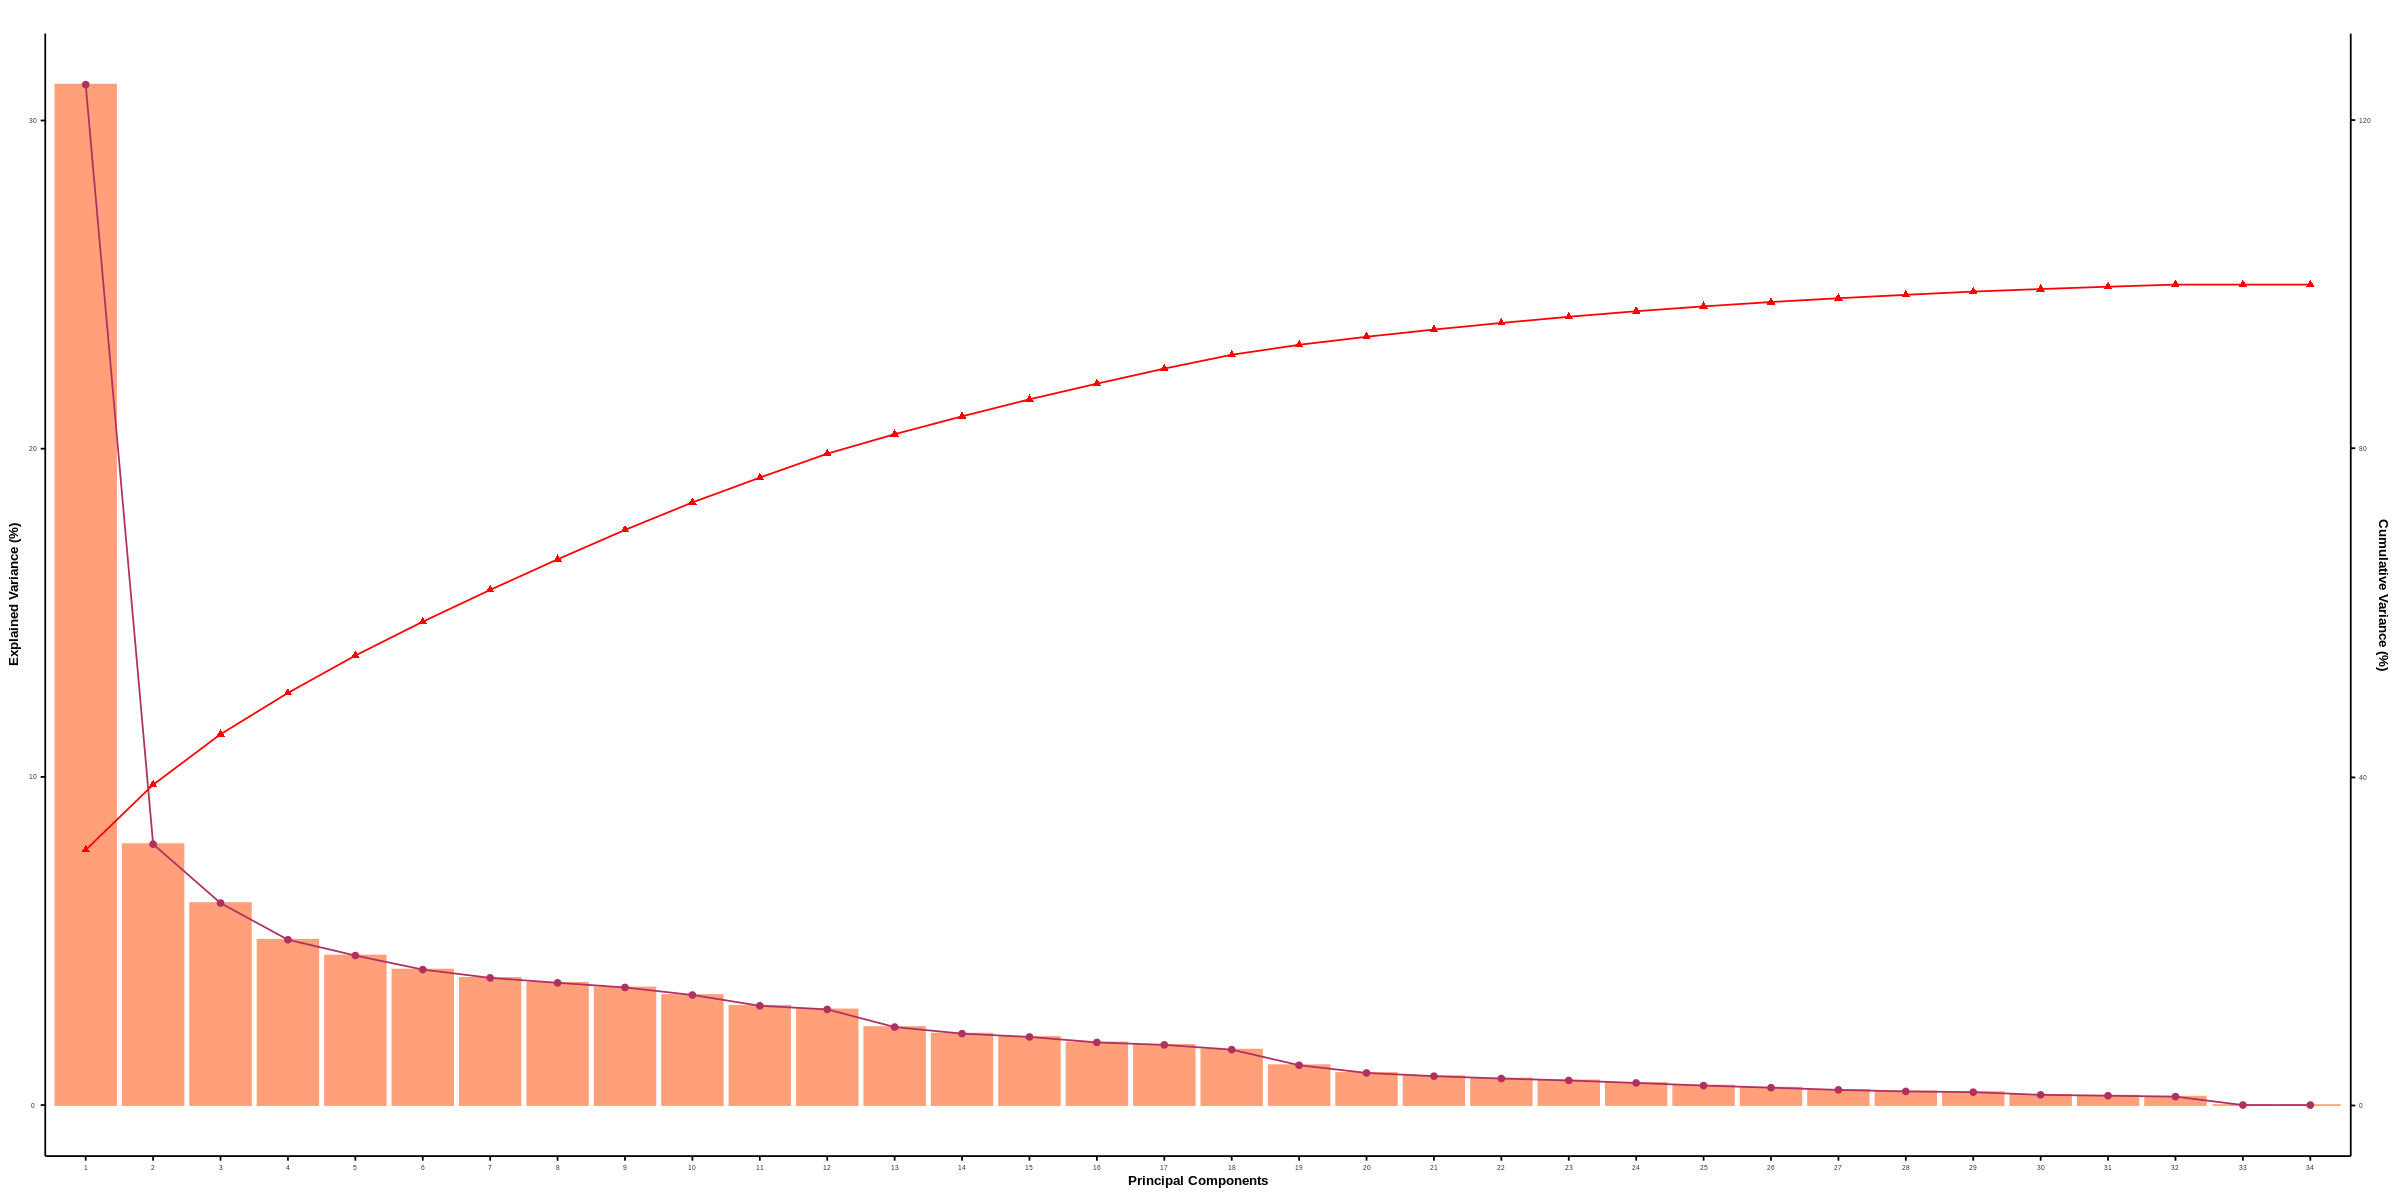

In [706]:
dft2.pca=prcomp(dft2[-1][-35])
prpca<-fviz_eig(dft2.pca,ncp=34,
  barfill = "lightsalmon",
  barcolor = "lightsalmon",
  linecolor = "maroon")+
  theme(plot.title = element_text(hjust = 0.5),text = element_text(size=8),
        axis.text.x = element_text(angle=0, hjust=0.5,vjust=0.5,colour = "grey20",size=4),
        axis.text.y = element_text(angle=0, hjust=0.5,vjust=0.5,colour = "grey20",size=4),
        legend.position="none",#legend.key.size = unit(0.4,"line"),
       panel.background = element_rect(fill = "white",
                                colour = "white",
                                size = 0.5, linetype = "solid"),
  panel.grid.major = element_line(size = 0.5, linetype = 'solid',
                                colour = "white"), 
  panel.grid.minor = element_line(size = 0.25, linetype = 'solid',
                                colour = "white"),axis.line = element_line(colour = "black"))+labs(x=expression(bold('Principal Components')),y=expression(bold('Explained Variance (%)')), title='')
dft21.pca <- dft2.pca$sdev^2 
dft211.pca <- dft21.pca/sum(dft21.pca)

df <- data.frame(x=1:length(dft211.pca),
                 y=cumsum(dft211.pca)*100/4)
prpca <- prpca + 
     geom_point(data=df, aes(x, y), size=1.5, color="red",shape=17) +
     geom_line(data=df, aes(x, y), color="red") +
     scale_y_continuous(sec.axis = sec_axis(~ . * 4, 
                                   name = expression(bold("Cumulative Variance (%)") )))
#print(p)
options(repr.plot.width = 20, repr.plot.height = 10)
#both_plt <- pos_plt|neg_plt
prpca
ggsave("../figures/scree_plot_prcomp3.png", prpca, width =8, height = 5)
#dev.off()

In [ ]:
df <- data.frame(x=1:length(dft211.pca),
                 y=cumsum(dft211.pca)*100/4)

In [705]:
bp1<-as.ggplot(fviz_pca_biplot(dft2.pca,axes = c(1, 2),
                col.ind = dft2$Diagnosed, 
                #palette=wes_palette(n=5, name="Darjeeling1"),
                palette = c("maroon", "lightsalmon"), 
                addEllipses = FALSE, label = "var",
                col.var = "black", repel = TRUE,
                legend.title='Diagnosed',title='',legend.size=25)+labs(x=expression(bold('DIM-1')),y=expression(bold('DIM-2')))+#theme_minimal()
theme(legend.text=element_text(size=18),text = element_text(size = 28),axis.title = element_text(size = 20),axis.text = element_text(size = 22))+ guides(shape = guide_legend(override.aes = list(size = 5)))
)
png("../figures/biplot_promp_d12.png",width = 1200, height = 1200)
options(repr.plot.width = 20, repr.plot.height = 10)
bp1
dev.off()

png 
  2

In [ ]:
df <- data.frame(id=c('GEN\n(B+HI+GS)','GEN\n(B+HI+GS+TSS)','SM','TA','SM+TA','SM+TA+GEN\n(B+HI+GS+TSS)'), min=c(63.2,63.64,68.75,56.92,67.38,68.0), max=c(76.16,76.92,83.72,71.43,80.15,80.0))
df$id<-factor(df$id, levels = unique(df$id))
library(ggplot2)
p<-ggplot(df, aes(x=id))+
geom_linerange(aes(ymin=min,ymax=max),linetype=2,color="blue")+
geom_point(aes(y=min),size=1,color="red")+
geom_point(aes(y=max),size=1,color="red")+
#theme_bw()
theme(plot.title = element_text(hjust = 0.5),text = element_text(size=6),
        axis.text.x = element_text(angle=0, hjust=0.5,vjust=0.5),legend.position="none",#,colour = "grey40",size=4),
       panel.background = element_rect(fill = "white",
                                colour = "white",
                                size = 0.5, linetype = "solid"),
  panel.grid.major = element_line(size = 0.5, linetype = 'solid',
                                colour = "white"), 
  panel.grid.minor = element_line(size = 0.25, linetype = 'solid',
                                colour = "white"),axis.line = element_line(colour = "black"))+
labs(x=expression(bold("Feature Set")),y=expression(bold("Evaluation Metric\nScore(LB to UB)")),title=expression(bold("Accuracy")))


options(repr.plot.width = 20, repr.plot.height = 20)
ggsave("../figures/acc.png", p, width = 5, height = 5)

In [ ]:
df <- data.frame(id=c('GEN\n(B+HI+GS)','GEN\n(B+HI+GS+TSS)','SM','TA','SM+TA','SM+TA+GEN\n(B+HI+GS+TSS)'), min=c(63.43,64.17,69.49,57.21,67.76,68.68), max=c(76.24,76.93,84.48,71.82,80.83,80.97))
df$id<-factor(df$id, levels = unique(df$id))
library(ggplot2)
p<-ggplot(df, aes(x=id))+
geom_linerange(aes(ymin=min,ymax=max),linetype=2,color="blue")+
geom_point(aes(y=min),size=1,color="red")+
geom_point(aes(y=max),size=1,color="red")+
#theme_bw()
theme(plot.title = element_text(hjust = 0.5),text = element_text(size=6),
        axis.text.x = element_text(angle=0, hjust=0.5,vjust=0.5),legend.position="none",#,colour = "grey40",size=4),
       panel.background = element_rect(fill = "white",
                                colour = "white",
                                size = 0.5, linetype = "solid"),
  panel.grid.major = element_line(size = 0.5, linetype = 'solid',
                                colour = "white"), 
  panel.grid.minor = element_line(size = 0.25, linetype = 'solid',
                                colour = "white"),axis.line = element_line(colour = "black"))+
labs(x=expression(bold("Feature Set")),y=expression(bold("Evaluation Metric\nScore(LB to UB)")),title=expression(bold("Precision")))


options(repr.plot.width = 20, repr.plot.height = 20)
ggsave("../figures/pc.png", p, width = 5, height = 5)

In [ ]:
df <- data.frame(id=c('GEN\n(B+HI+GS)','GEN\n(B+HI+GS+TSS)','SM','TA','SM+TA','SM+TA+GEN\n(B+HI+GS+TSS)'), min=c(63.2,63.64,68.75,56.92,67.38,68.0), max=c(76.16,76.92,83.72,71.43,80.15,80.0))
df$id<-factor(df$id, levels = unique(df$id))
library(ggplot2)
p<-ggplot(df, aes(x=id))+
geom_linerange(aes(ymin=min,ymax=max),linetype=2,color="blue")+
geom_point(aes(y=min),size=1,color="red")+
geom_point(aes(y=max),size=1,color="red")+
#theme_bw()
theme(plot.title = element_text(hjust = 0.5),text = element_text(size=6),
        axis.text.x = element_text(angle=0, hjust=0.5,vjust=0.5),legend.position="none",#,colour = "grey40",size=4),
       panel.background = element_rect(fill = "white",
                                colour = "white",
                                size = 0.5, linetype = "solid"),
  panel.grid.major = element_line(size = 0.5, linetype = 'solid',
                                colour = "white"), 
  panel.grid.minor = element_line(size = 0.25, linetype = 'solid',
                                colour = "white"),axis.line = element_line(colour = "black"))+
labs(x=expression(bold("Feature Set")),y=expression(bold("Evaluation Metric\nScore(LB to UB)")),title=expression(bold("Recall")))


options(repr.plot.width = 20, repr.plot.height = 20)
ggsave("../figures/re.png", p, width = 5, height = 5)

In [ ]:
df <- data.frame(id=c('GEN\n(B+HI+GS)','GEN\n(B+HI+GS+TSS)','SM','TA','SM+TA','SM+TA+GEN\n(B+HI+GS+TSS)'), min=c(62.85,63.58,67.70,56.22,67.25,66.95), max=c(76.15,76.9,83.41,71.3,79.87,79.76))
df$id<-factor(df$id, levels = unique(df$id))
library(ggplot2)
p<-ggplot(df, aes(x=id))+
geom_linerange(aes(ymin=min,ymax=max),linetype=2,color="blue")+
geom_point(aes(y=min),size=1,color="red")+
geom_point(aes(y=max),size=1,color="red")+
#theme_bw()
theme(plot.title = element_text(hjust = 0.5),text = element_text(size=6),
        axis.text.x = element_text(angle=0, hjust=0.5,vjust=0.5),legend.position="none",#,colour = "grey40",size=4),
       panel.background = element_rect(fill = "white",
                                colour = "white",
                                size = 0.5, linetype = "solid"),
  panel.grid.major = element_line(size = 0.5, linetype = 'solid',
                                colour = "white"), 
  panel.grid.minor = element_line(size = 0.25, linetype = 'solid',
                                colour = "white"),axis.line = element_line(colour = "black"))+
labs(x=expression(bold("Feature Set")),y=expression(bold("Evaluation Metric\nScore(LB to UB)")),title=expression(bold("F1-Score")))


options(repr.plot.width = 20, repr.plot.height = 20)
ggsave("../figures/f1.png", p, width = 5, height = 5)

In [ ]:
df <- data.frame(id=c('GEN\n(B+HI+GS)','GEN\n(B+HI+GS+TSS)','SM','TA','SM+TA','SM+TA+GEN\n(B+HI+GS+TSS)'), min=c(63.26,63.71,66.7,56.97,67.06,66.97), max=c(76.03,76.87,82.48,71.19,79.43,79.38))
df$id<-factor(df$id, levels = unique(df$id))
library(ggplot2)
p<-ggplot(df, aes(x=id))+
geom_linerange(aes(ymin=min,ymax=max),linetype=2,color="blue")+
geom_point(aes(y=min),size=1,color="red")+
geom_point(aes(y=max),size=1,color="red")+
#theme_bw()
theme(plot.title = element_text(hjust = 0.5),text = element_text(size=6),
        axis.text.x = element_text(angle=0, hjust=0.5,vjust=0.5),legend.position="none",#,colour = "grey40",size=4),
       panel.background = element_rect(fill = "white",
                                colour = "white",
                                size = 0.5, linetype = "solid"),
  panel.grid.major = element_line(size = 0.5, linetype = 'solid',
                                colour = "white"), 
  panel.grid.minor = element_line(size = 0.25, linetype = 'solid',
                                colour = "white"),axis.line = element_line(colour = "black"))+
labs(x=expression(bold("Feature Set")),y=expression(bold("Evaluation Metric\nScore(LB to UB)")),title=expression(bold("AUC")))


options(repr.plot.width = 20, repr.plot.height = 20)
ggsave("../figures/auc.png", p, width = 5, height = 5)

In [ ]:
d=data.frame(x1=x1, x2=x2,y1=c(70.27,72.38,57.58,68.71,71.62,70.41,72.12,57.33,68.33,71.8,69.73,70.49,56.78,66.85,70.11,69.6,70.67,56.2,66.76,70.1), y2=c(80.41,86.32,74.02,82.52,82.69,82.8,86.93,74.66,83.89,83.74,79.76,85.21,72.74,81.56,81.7,79.92,85.56,72.92,81.83,82.16), Features=c('GEN','SM','TA','SM+TA','GEN+SM+TA','GEN','SM','TA','SM+TA','GEN+SM+TA','GEN','SM','TA','SM+TA','GEN+SM+TA','GEN','SM','TA','SM+TA','GEN+SM+TA'))
d$Features = factor(d$Features, levels=c('GEN','SM','TA','SM+TA','GEN+SM+TA'))
p<-ggplot() + 
#scale_x_continuous(name="x") + 
#scale_y_continuous(name="y") +
geom_rect(data=d, mapping=aes(xmin=x1, xmax=x2, ymin=y1, ymax=y2, fill=Features), color="black", alpha=0.5) +
#geom_text(data=d, aes(x=x1+(x2-x1)/2, label=c(3.5,12,20.5,29)),size=4) +
theme(plot.title = element_text(hjust = 0.5),text = element_text(size=12,face='bold'),axis.text.x = element_blank(),axis.ticks.x = element_blank(),axis.text.y=element_text(size=12,face='bold'),legend.text=element_text(size=12,face='bold'),
  #axis.ticks = element_blank(),
       panel.background = element_rect(fill = "white",
                                colour = "white",
                                size = 0.5, linetype = "solid"),
  panel.grid.major = element_line(size = 0.5, linetype = 'solid',
                                colour = "white"), 
  panel.grid.minor = element_line(size = 0.25, linetype = 'solid',
                                colour = "white"),axis.line = element_line(colour = "black"))+
#coord_flip(clip = "off") +
labs(x=expression(bold("Feature Set")),y=expression(bold("Evaluation Metric Score (LB to UB)")),title=expression(bold("Accuracy\t\t\t\t\tPrecision\t\t\t\t\tRecall\t\t\t\t\tF1-Score")))
p<-p+ geom_vline(xintercept=8.5,linetype="dotted")
p<-p+ geom_vline(xintercept=18.5,linetype="dotted")
p<-p+ geom_vline(xintercept=28.5,linetype="dotted")
#scale_x_discrete(labels=c("3.5" = "Dose 0.5", "12" = "Dose 1",
#                              "20.5" = "Dose 2","29"="Dose 3"))
ggsave("../figures/comp.png", p, width = 12, height = 5)